In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [34]:
dataset = pd.read_csv('../dataset/insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
ohe = OneHotEncoder()
ohe_feature = ohe.fit_transform(dataset[['region']]).toarray()
feature_name = ohe.categories_
ohe_df = pd.DataFrame(ohe_feature, columns=feature_name)
dataset = pd.concat([dataset, ohe_df], axis=1)
dataset['sex'] = np.where(dataset['sex'] == 'male', 1, 0)
dataset['smoker'] = np.where(dataset['smoker'] == 'yes', 1, 0)
dataset.drop(['region'], axis=1, inplace=True)

charges_col = dataset.pop('charges')
dataset.insert(dataset.shape[1], 'charges', charges_col)

In [4]:
dataset

,age,sex,bmi,children,smoker,"(northeast,)","(northwest,)","(southeast,)","(southwest,)",charges
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0,16884.92400
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0,1725.55230
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0,4449.46200
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0,21984.47061
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0.0,1.0,0.0,0.0,10600.54830
1334,18,0,31.920,0,0,1.0,0.0,0.0,0.0,2205.98080
1335,18,0,36.850,0,0,0.0,0.0,1.0,0.0,1629.83350
1336,21,0,25.800,0,0,0.0,0.0,0.0,1.0,2007.94500


In [5]:
minmax_scaler = MinMaxScaler()
dataset = minmax_scaler.fit_transform(dataset)

In [6]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [7]:
X_train, X_eval, y_train, y_eval = dataset[:1001, :-1], dataset[1001:, :-1], dataset[:1001, -1], dataset[1001:, -1]

In [8]:
lr = linear_model.LinearRegression()

In [9]:
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_eval_predict = lr.predict(X_eval)

In [12]:
rmse = np.sqrt(mean_squared_error(y_eval, y_eval_predict))

In [13]:
rmse

0.10263128263296332

In [85]:
def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for _ in range(3):
        model.fit(X_train, y_train)
        y_train_predict = model.predict(X_train)
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r', linewidth=1, label='train')
    plt.plot(np.sqrt(val_errors), 'b', linewidth=1, label='val')


In [86]:
lr = linear_model.LinearRegression()

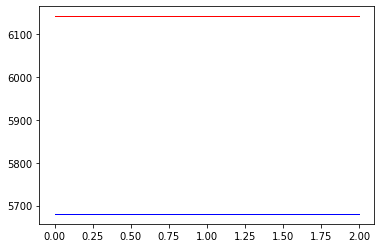

In [87]:
plot_learning_curve(lr, X, y)

In [29]:
import sys 
sys.path.append('algorithms')

In [37]:
from algorithms.compare.linear_regression import LinearRegressionFC

ModuleNotFoundError: No module named 'algorithms'

In [36]:
import algorithms.from_scratch.linear_regression_fc

ModuleNotFoundError: No module named 'algorithms'